In [2]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Concatenate, Dropout, Conv2DTranspose
import os
from keras.preprocessing.image import load_img, ImageDataGenerator

Using TensorFlow backend.


In [3]:
cd datasets\CamSeq01

C:\Users\Ansh Singal\Desktop\study\py\NN\datasets\CamSeq01


In [4]:
pwd

'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\datasets\\CamSeq01'

In [5]:
file=open('label_colors.txt', 'r')

In [6]:
def read_colors(file):
    color={}
    classes={}
    color1={}
    for line in file:
        i,j=line.strip().split('\t', maxsplit=1)
        color[len(color)]=i
        classes[len(classes)]=j

    for i in range(len(color)):
        color1[len(color1)]=tuple([int(i) for i in color[i].split(' ')])
    return (color1, classes)

In [7]:
def to_onehot(img, color1):
    img_new=np.zeros((img.shape[:2])+(len(color1),))
    for i in range(len(color1)):
        img_new[:,:,i]=np.all(img.reshape((-1,3))==(color1[i]), axis=1).reshape(img_new.shape[:2])
    #print(img_new.shape)
    return img_new

In [8]:
def augment_val2():

    file=open('label_colors.txt', 'r')
    color1, classes=read_colors(file)

    data_gen=ImageDataGenerator(rescale=1.0/255)
    mask_gen=ImageDataGenerator()

    seed=1

#    #create sample for fitting data
#    img=os.listdir('../CamSeq01/data/val/img')
#    data_sample=[np.asarray(load_img('../CamSeq01/data/val/img/'+i))/255.0 for j,i in zip(range(5), img)]
#    #create sample for fitting mask
#    img=os.listdir('../CamSeq01/mask/val/img')
#    mask_sample=[np.asarray(load_img('../CamSeq01/mask/val/img/'+i))/255.0 for j,i in zip(range(5), img)]
#    #fitting both mask and data
#    data_gen.fit(data_sample, seed=seed)
#    mask_gen.fit(mask_sample, seed=seed)

    data_generator=data_gen.flow_from_directory('../CamSeq01/data/val',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    mask_generator=mask_gen.flow_from_directory('../CamSeq01/mask/val',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    #print(type(data_generator))

    while(1):
        data=data_generator.next()
        y1=mask_generator.next()

        #print(x1[1])

        encoded_mask=[to_onehot(img, color1) for img in y1]
        #print(x1.shape)
        #    print(np.asarray(encoded_mask).shape)
        #    print(x1.shape)
        yield data, np.asarray(encoded_mask)

Found 71 images belonging to 1 classes.
Found 71 images belonging to 1 classes.


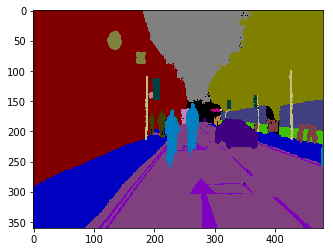

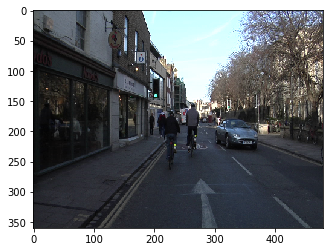

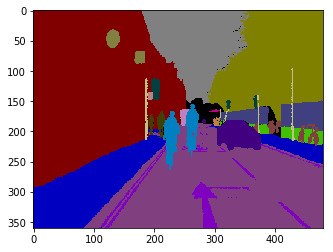

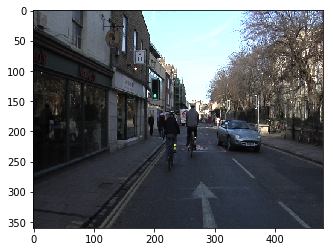

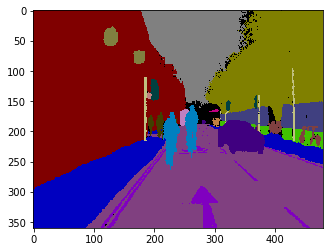

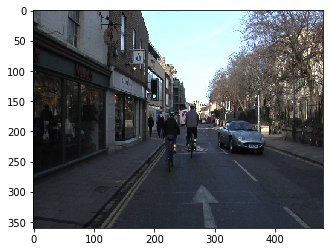

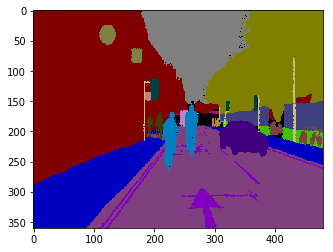

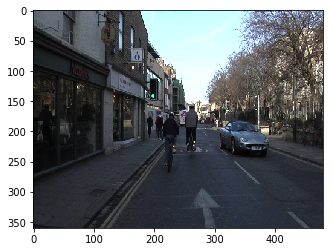

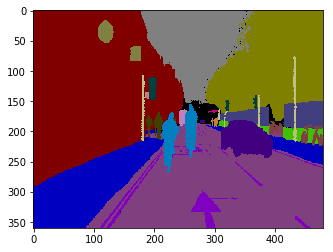

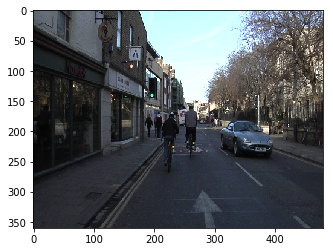

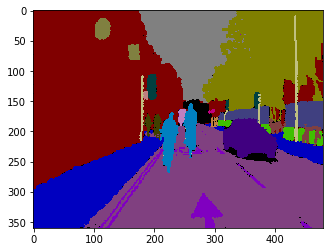

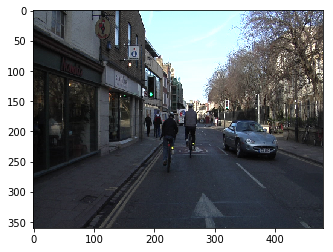

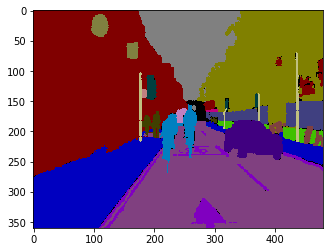

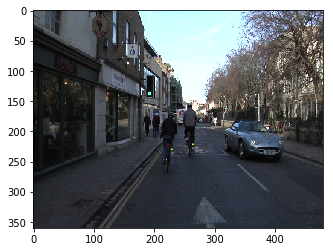

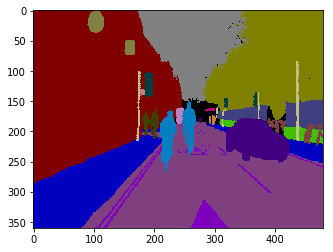

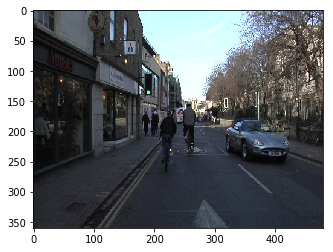

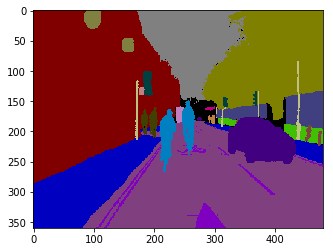

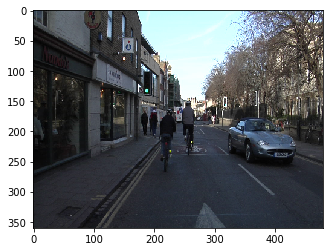

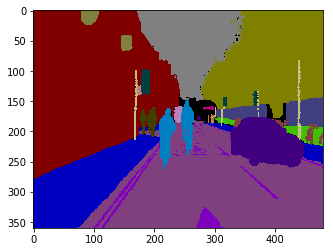

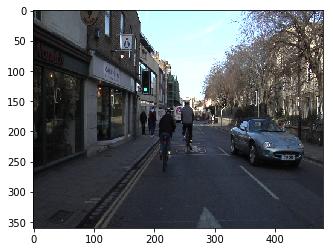

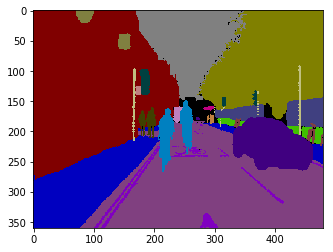

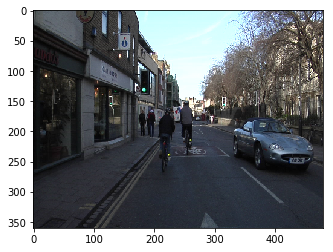

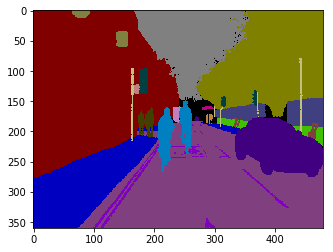

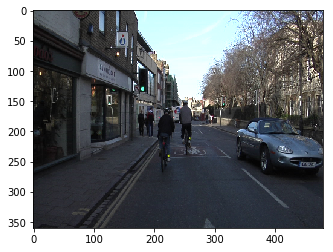

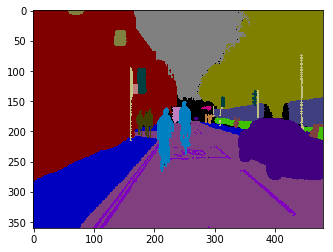

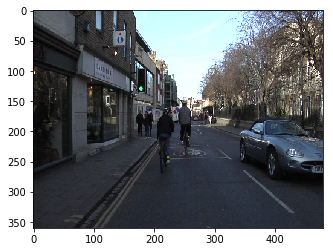

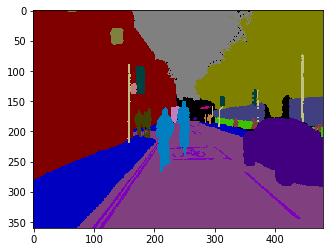

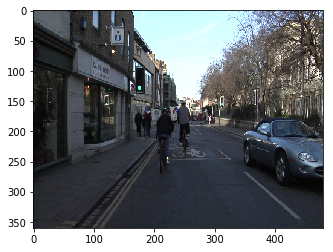

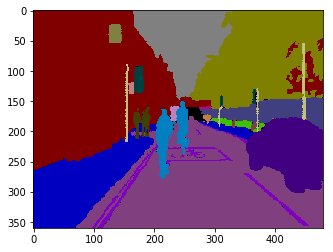

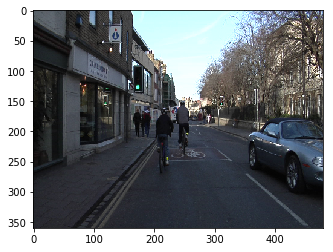

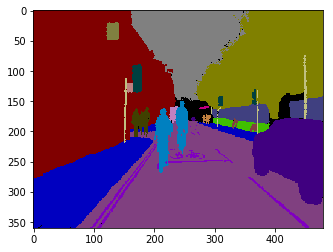

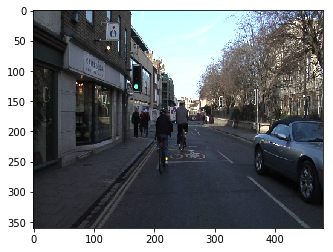

In [13]:
def augment_train2():
# import sys
# np.set_printoptions(threshold=sys.maxsize)
    file=open('label_colors.txt', 'r')
    color1, classes=read_colors(file)

    data_gen=ImageDataGenerator(rescale=1.0/255)
    mask_gen=ImageDataGenerator()

    seed=1

    #    #create sample for fitting data
    #    img=os.listdir('../CamSeq01/data/train/img')
    #    data_sample=[np.asarray(load_img('../CamSeq01/data/train/img/'+i))/255.0 for j,i in zip(range(5), img)]
    #    #create sample for fitting mask
    #    img=os.listdir('../CamSeq01/mask/train/img')
    #    mask_sample=[np.asarray(load_img('../CamSeq01/mask/train/img/'+i))/255.0 for j,i in zip(range(5), img)]
    #    #fitting both mask and data
    #    data_gen.fit(data_sample, seed=seed)
    #    mask_gen.fit(mask_sample, seed=seed)

    data_generator=data_gen.flow_from_directory('../CamSeq01/data/train',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    mask_generator=mask_gen.flow_from_directory('../CamSeq01/mask/train',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    #print(type(data_generator))

    while(1):
        data=data_generator.next()
        y1=mask_generator.next()
        #print(type(y1))
        #print((y1))
        #print(x1[1])

        encoded_mask=[to_onehot(img, color1) for img in y1]
        #print(x1.shape)
        #    print(np.asarray(encoded_mask).shape)
        #    print(x1.shape)
        yield data, np.asarray(encoded_mask)
#print(type(x1))
#for i in range(5):
#    plt.imshow(x1[i])
#    plt.show()
#plt.plot(x1[1])
#print(encoded_mask[0])
# for img in encoded_mask:
#    print(img.shape)
#    plt.imshow(img)
#for img in encoded_mask:
 #   plt.imshow(img)

In [7]:
def augment_train():

    file=open('label_colors.txt', 'r')
    color1, classes=read_colors(file)

    data_gen=ImageDataGenerator(rotation_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                rescale=1.0/255,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)
    mask_gen=ImageDataGenerator(rotation_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True)

    seed=1

#    #create sample for fitting data
#    img=os.listdir('../CamSeq01/data/train/img')
#    data_sample=[np.asarray(load_img('../CamSeq01/data/train/img/'+i))/255.0 for j,i in zip(range(5), img)]
#    #create sample for fitting mask
#    img=os.listdir('../CamSeq01/mask/train/img')
#    mask_sample=[np.asarray(load_img('../CamSeq01/mask/train/img/'+i))/255.0 for j,i in zip(range(5), img)]
#    #fitting both mask and data
#    data_gen.fit(data_sample, seed=seed)
#    mask_gen.fit(mask_sample, seed=seed)

    data_generator=data_gen.flow_from_directory('../CamSeq01/data/train',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    mask_generator=mask_gen.flow_from_directory('../CamSeq01/mask/train',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    #print(type(data_generator))

    while(1):
        data=data_generator.next()
        y1=mask_generator.next()

        #print(x1[1])

        encoded_mask=[to_onehot(img, color1) for img in y1]
        #print(x1.shape)
        #    print(np.asarray(encoded_mask).shape)
        #    print(x1.shape)
        yield data, np.asarray(encoded_mask)
        #print(type(x1))
        #for i in range(5):
        #    plt.imshow(x1[i])
        #    plt.show()
        #plt.plot(x1[1])
        #for img in x1:
         #   print(img.shape)
          #  plt.imshow(img)
        #for img in encoded_mask:
         #   plt.imshow(img)

In [8]:
def augment_val():

    file=open('label_colors.txt', 'r')
    color1, classes=read_colors(file)

    data_gen=ImageDataGenerator(rescale=1.0/255)
    mask_gen=ImageDataGenerator()

    seed=1

#    #create sample for fitting data
#    img=os.listdir('../CamSeq01/data/val/img')
#    data_sample=[np.asarray(load_img('../CamSeq01/data/val/img/'+i))/255.0 for j,i in zip(range(5), img)]
#    #create sample for fitting mask
#    img=os.listdir('../CamSeq01/mask/val/img')
#    mask_sample=[np.asarray(load_img('../CamSeq01/mask/val/img/'+i))/255.0 for j,i in zip(range(5), img)]
#    #fitting both mask and data
#    data_gen.fit(data_sample, seed=seed)
#    mask_gen.fit(mask_sample, seed=seed)

    data_generator=data_gen.flow_from_directory('../CamSeq01/data/val',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    mask_generator=mask_gen.flow_from_directory('../CamSeq01/mask/val',
                                                target_size=(360, 480),
                                                batch_size=16,
                                                shuffle=False,
                                                class_mode=None,
                                                seed=seed)
    #print(type(data_generator))

    while(1):
        data=data_generator.next()
        y1=mask_generator.next()

        #print(x1[1])

        encoded_mask=[to_onehot(img, color1) for img in y1]
        #print(x1.shape)
        #    print(np.asarray(encoded_mask).shape)
        #    print(x1.shape)
        yield data, np.asarray(encoded_mask)

In [9]:
def get_unet(input_image, n_filter = 8, dropout = 0.7, kernel_size=3):
    # Contracting Path
    #c1 = conv2d_block(n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    c1 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same', name='first_layer')(input_image)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    c1 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same', name='second_layer')(c1)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    
    #c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    c2 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same', name='third_layer')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    c2 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same', name='fourth_layer')(c2)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    
    #c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    c3 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    c3 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(c3)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    
    #c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
#    c4 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(p3)
#    c4 = BatchNormalization()(c4)
#    c4 = Activation('relu')(c4)
#    
#    c4 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(c4)
#    c4 = BatchNormalization()(c4)
#    c4 = Activation('relu')(c4)
#   
#    p4 = MaxPooling2D((2, 2))(c4)
#    p4 = Dropout(dropout)(p4)
    
    
    #code section of autoencoder
    #c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    c5 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same', name='first_code_layer')(p3)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    c5 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same', name='second_code_layer')(c5)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    
    # Expansive Path
    ## doubt: why is the stride (2,2) and (1,1)
#    u6 = Conv2DTranspose(n_filter * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
#    u6 = Concatenate()([u6, c4])
#    u6 = Dropout(dropout)(u6)
#    ##c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
#    c6 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(u6)
#    c6 = BatchNormalization()(c6)
#    c6 = Activation('relu')(c6)
#    
#    c6 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(c6)
#    c6 = BatchNormalization()(c6)
#    c6 = Activation('relu')(c6)
   
    
    u7 = Conv2DTranspose(n_filter * 4, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u7 = Concatenate()([u7, c3])
    u7 = Dropout(dropout)(u7)
    ##c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    c7 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    c7 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(c7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    
    u8 = Conv2DTranspose(n_filter * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = Concatenate()([u8, c2])
    u8 = Dropout(dropout)(u8)
    ##c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    c8 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same', name='1st_ex_layer')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
    c8 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same', name='2nd_ex_layer')(c8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
    
    u9 = Conv2DTranspose(n_filter * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = Concatenate()([u9, c1])
    u9 = Dropout(dropout)(u9)
    ##c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    c9 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same', name='3rd_ex_layer')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    c9 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same', name='4th_ex_layer')(c9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    
    # basically we want a sigmoid activation layer with depth of 1
    outputs = Conv2D(32, (1, 1), activation='softmax', padding='same', name='output_layer')(c9)
    
    model = Model(inputs=[input_image], outputs=[outputs])
    return model

In [10]:
img=Input((None, None, 3))
model=get_unet(img)

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit_generator(generator=augment_train(), steps_per_epoch=20, epochs=20, verbose=1, validation_data=augment_val(), validation_steps=15)

Epoch 1/20
Found 30 images belonging to 1 classes.
Found 71 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 71 images belonging to 1 classes.
20/20 [==============================] - 910s 46s/step - loss: 3.3411 - acc: 0.0419 - val_loss: 3.1398 - val_acc: 0.1911
Epoch 2/20
20/20 [==============================] - 762s 38s/step - loss: 3.0202 - acc: 0.1695 - val_loss: 3.8137 - val_acc: 0.1552
Epoch 3/20
20/20 [==============================] - 754s 38s/step - loss: 2.7682 - acc: 0.2676 - val_loss: 4.4994 - val_acc: 0.1463
Epoch 4/20
20/20 [==============================] - 755s 38s/step - loss: 2.5991 - acc: 0.2988 - val_loss: 2.4988 - val_acc: 0.2300
Epoch 5/20
20/20 [==============================] - 782s 39s/step - loss: 2.4465 - acc: 0.3112 - val_loss: 2.5149 - val_acc: 0.1979
Epoch 6/20
20/20 [==============================] - 753s 38s/step - loss: 2.3199 - acc: 0.3012 - val_loss: 2.3246 - val_acc: 0.2219
Epoch 7/20
20/20 [==============================

In [13]:
model.save('multi-class_sem2')

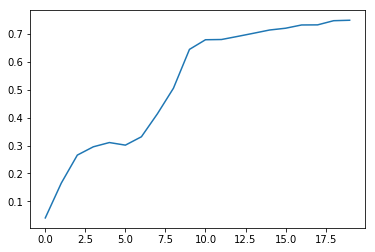

In [15]:
plt.plot(history.history['acc'])

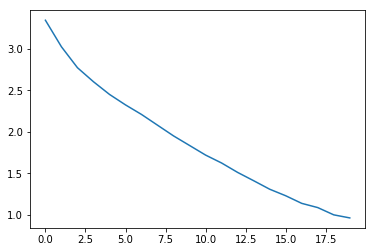

In [16]:
plt.plot(history.history['loss'])

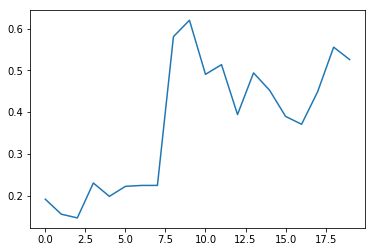

In [17]:
plt.plot(history.history['val_acc'])

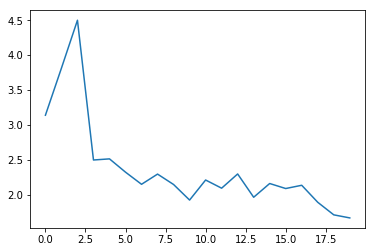

In [18]:
plt.plot(history.history['val_loss'])

In [10]:
def to_rgb(img):
    file=open('label_colors.txt', 'r')
    color1, classes=read_colors(file)
    single_layer = np.argmax(img, axis=-1).reshape(-1,1)
    output = np.zeros( img.shape[:2]+(3,) ).reshape((-1,3))
    for i in range(len(color1)):
        output=np.where(single_layer==i, color1[i],output)
    return output.reshape(img.shape[:2]+(3,))

[[[128 128 128]
  [128   0   0]
  [128   0   0]
  ...
  [128   0   0]
  [128   0   0]
  [128   0   0]]

 [[128   0   0]
  [128   0   0]
  [128   0   0]
  ...
  [128   0   0]
  [128   0   0]
  [128   0   0]]

 [[128   0   0]
  [128   0   0]
  [128 128 128]
  ...
  [128 128   0]
  [128 128 128]
  [128 128 128]]

 ...

 [[128   0   0]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128   0   0]
  [128 128 128]]

 [[128   0   0]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128   0   0]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128   0   0]]]


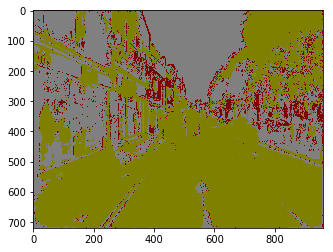

In [47]:
#to load multiple images from a directory(in this case, the training dataset)
#arr=[]
#for i,img in zip(range(5), os.listdir('../CamSeq01/data/train/img')):
    #arr.append(np.asarray(load_img('../CamSeq01/data/train/img/'+img)))
#arr=np.asarray(arr)

arr=np.asarray(load_img('../CamSeq01/data/train/img/0016E5_08019.png'))
arr=arr.reshape((1, )+arr.shape[:3])
img=model.predict(arr)

for i in img:
    j=to_rgb(i)
    j=j.astype(int)
    print(j)
    plt.imshow(j)
    plt.show()

In [23]:
pwd

'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\datasets\\CamSeq01'

In [10]:
img=Input((None, None, 3))
model2=get_unet(img)

In [11]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model2.fit_generator(generator=augment_train(), steps_per_epoch=25, epochs=30, verbose=1, validation_data=augment_val(), validation_steps=15)

Epoch 1/30
Found 30 images belonging to 1 classes.
Found 71 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 71 images belonging to 1 classes.
25/25 [==============================] - 1008s 40s/step - loss: 3.0668 - acc: 0.1598 - val_loss: 2.8475 - val_acc: 0.2720
Epoch 2/30
25/25 [==============================] - 942s 38s/step - loss: 2.7186 - acc: 0.3539 - val_loss: 2.8189 - val_acc: 0.2962
Epoch 3/30
25/25 [==============================] - 980s 39s/step - loss: 2.4903 - acc: 0.3770 - val_loss: 2.9158 - val_acc: 0.3433
Epoch 4/30
25/25 [==============================] - 953s 38s/step - loss: 2.3072 - acc: 0.3580 - val_loss: 2.5235 - val_acc: 0.3427
Epoch 5/30
25/25 [==============================] - 1009s 40s/step - loss: 2.1528 - acc: 0.3656 - val_loss: 2.3633 - val_acc: 0.3457
Epoch 6/30
25/25 [==============================] - 946s 38s/step - loss: 2.0156 - acc: 0.5244 - val_loss: 2.3869 - val_acc: 0.3405
Epoch 7/30
25/25 [============================

In [13]:
model2.save("multi-class_sem3")

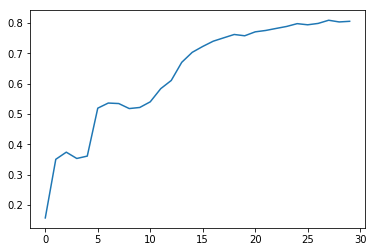

In [14]:
plt.plot(history.history['acc'])

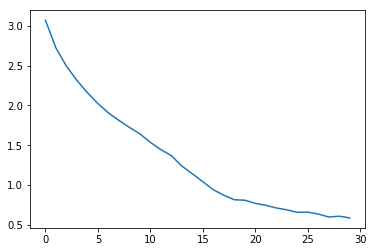

In [15]:
plt.plot(history.history['loss'])

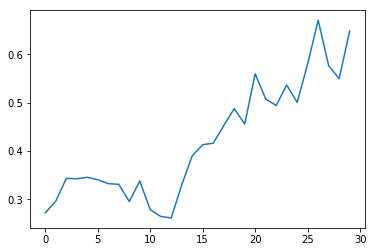

In [16]:
plt.plot(history.history['val_acc'])

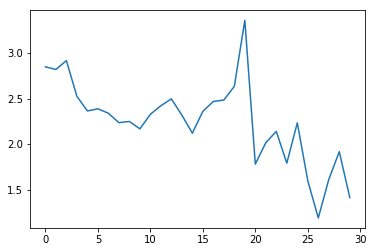

In [17]:
plt.plot(history.history['val_loss'])

[[[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128   0]
  [128 128   0]
  [128 128   0]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128   0]
  [128 128   0]
  [128 128   0]]

 ...

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128  64 128]
  [128  64 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]]


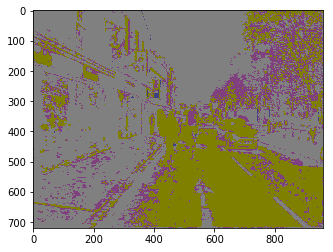

In [20]:
arr=np.asarray(load_img('../CamSeq01/data/train/img/0016E5_08019.png'))
arr=arr.reshape((1, )+arr.shape[:3])
img=model2.predict(arr)

for i in img:
    j=to_rgb(i)
    j=j.astype(int)
    print(j)
    plt.imshow(j)
    plt.show()